

<p style="text-align:center; color:blue; font-size:30px;">ECSS Miniconference 2022</p>


<p style="text-align:center; color:green; font-size:40px;">An Introduction to Probabilistic Programming in Python using PyMC</p>



<p style="text-align:center; font-size:25px;">Danh Phan</p>



<p style="text-align:center; font-size:20px;">Linkedin: <a href="https://www.linkedin.com/in/danhpt">@danhpt</a> Twitter: <a href="https://twitter.com/danhpt">@danhpt</a></p>
<p style="text-align:center; font-size:20px;">Website: <a href="http://danhphan.net/">http://danhphan.net</a></p>

<p style="text-align:center; font-size:10px;">Nov 2022</p>

## 1. Introduction

### Bayes' Formula

Given two events A and B, the conditional probability of A given that B is true is expressed as follows:

$$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$$

### Bayesian Terminology

Replacing Bayes' Formula with conventional Bayes terms:

$$P(\theta|y) = \frac{P(y|\theta) \times P(\theta)}{P(y)} = \frac{P(y|\theta) \times P(\theta)}{\int P(y|\theta)P(\theta) d\theta}$$

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\), as expressed by the posterior distribution.

## 1. Introduction

### Why Bayesian Modeling?

- Conceptually transparent interpretation of probablity.
- Uncertainty quantification.
- Allows to explicitly include prior knowledge in the model.
- Felxible and suited for many applications in academia and industry.
- Scalable*

## 1. Introduction

### Why PyMC?

![PyMC](images/pymc4_announcement.png)

Learn more: [PyMC 4.0 Release Announcement](https://www.pymc.io/blog/v4_announcement.html)

In [1]:
import arviz as az
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 2. Data set

**[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)** is an interesting group of four data sets that share nearly **identical descriptive statistics** while in fact having very **different underlying relationships** between the independent and dependent variables. 

In [2]:
# Prepare the Anscombe's quartet datasets
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5], dtype=np.float64)
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = y3
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

In [3]:
len(x), len(y), len(y1), len(y2), len(y3), len(y4)

(11, 11, 11, 11, 11, 11)

In [4]:
def plot_data():
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
    axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
    axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

    for ax, (label, (x_, y)) in zip(axs.flat, datasets.items()):
        ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
        ax.tick_params(direction='in', top=True, right=True)
        ax.plot(x_, y, 'o')
        ax.set_xlabel('x')
        ax.set_ylabel('y')

        # linear regression
        p1, p0 = np.polyfit(x_, y, deg=1)  # slope, intercept
        ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

        # add text box for the statistics
        stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
                 f'$\\sigma$ = {np.std(y):.2f}\n'
                 f'$r$ = {np.corrcoef(x_, y)[0][1]:.2f}')
        bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
        ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
                transform=ax.transAxes, horizontalalignment='right')

    axs[1, 0].add_artist(plt.Rectangle((0, 2), 20, 12, fill=False, edgecolor='r', lw=5));

    fig.tight_layout();
    plt.show()

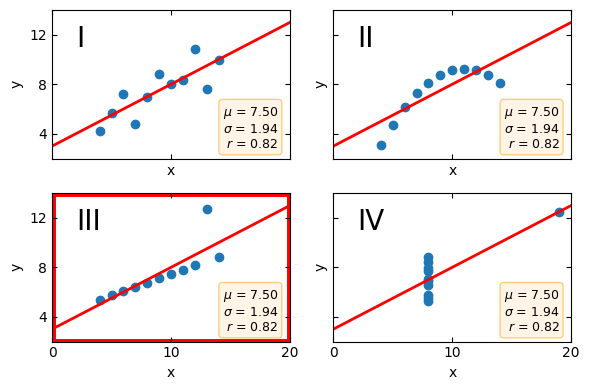

In [5]:
plot_data()

## 3.1. Linear regression
We use the ordinary least squares (OLS) line to fit these data using NumPy's `polyfit`.

In [6]:
def plot_line(m, b, label=None, **kwargs):
    if label:
        label = f"{label}: y = {m}*x + {b}"
    plt.axline((0, b), slope=m, label=label, **kwargs)
    plt.xlim(3.5, 14.5);
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend();

In [7]:
a_ols, b_ols = np.polyfit(x, y, deg=1)

In [8]:
ROUND = 4
a_ols, b_ols = round(a_ols, ROUND), round(b_ols, ROUND)

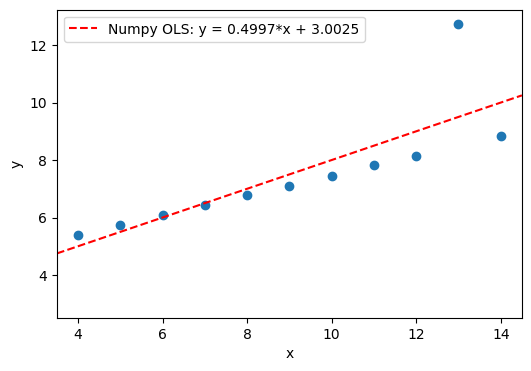

In [9]:
plt.scatter(x, y)
plot_line(a_ols, b_ols,c='r', ls='--', label="Numpy OLS")

## 3.2. Robust Linear regression

In [10]:
is_outlier = x == 13
a_robust, b_robust = np.polyfit(x[~is_outlier], y[~is_outlier], deg=1)

In [11]:
a_robust, b_robust = round(a_robust, 4), round(b_robust, 4)

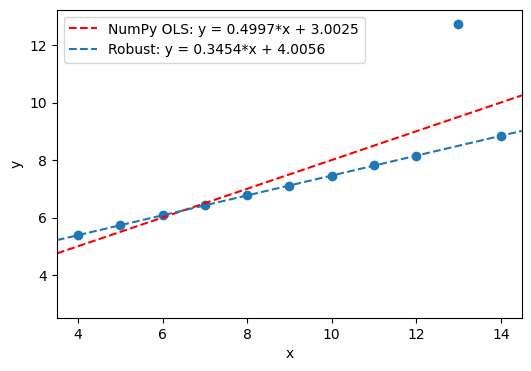

In [12]:
plt.scatter(x, y);
plot_line(a_ols, b_ols, c='r', ls='--', label="NumPy OLS");
plot_line(a_robust, b_robust, ls='--', label="Robust");

## 4.1. Bayesian Linear regression

In [13]:
with pm.Model() as ols_model:
    # Priors
    a = pm.Flat("a")
    b = pm.Flat("b")    
    σ = pm.HalfFlat("σ")
    
    # Likelihood
    y_obs = pm.Normal("y_obs", a * x + b, σ, observed=y)
    
    # MCMC sampling (Default: NUTS)
    ols_trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, σ]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.


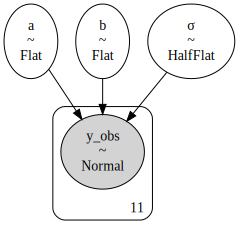

In [14]:
pm.model_to_graphviz(ols_model)

In [15]:
a_bays = ols_trace.posterior["a"].mean().values.round(ROUND)
b_bays = ols_trace.posterior["b"].mean().values.round(ROUND)

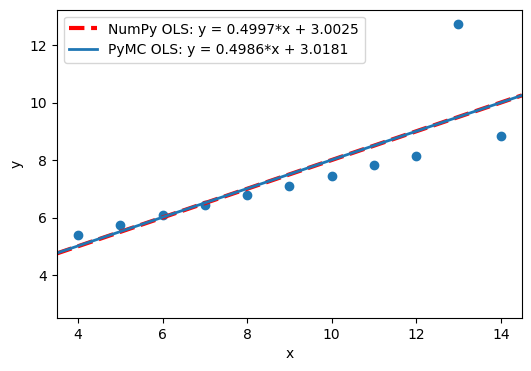

In [16]:
plt.scatter(x, y);
plot_line(a_ols, b_ols, c='r', ls='--', label="NumPy OLS", lw=3);
plot_line(a_bays, b_bays, c='C0', label="PyMC OLS", lw=2);

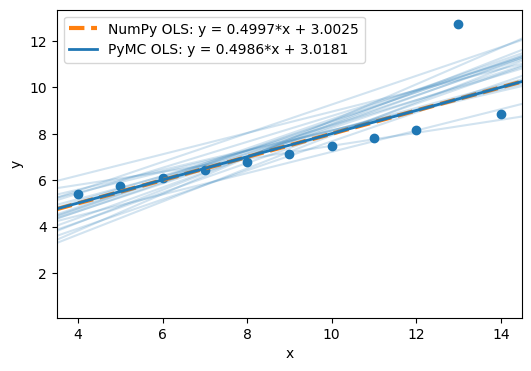

In [17]:
plt.scatter(x, y);
plot_line(a_ols, b_ols, c='C1', ls='--', label="NumPy OLS", lw=3);
plot_line(a_bays, b_bays, c='C0', label="PyMC OLS", lw=2);
# Plot many lines from posterior distributions
for a_, b_ in (ols_trace.posterior[["a", "b"]].sel(chain=0).thin(100).to_array().T):
    plot_line(a_.values, b_.values, c='C0', alpha=0.2);

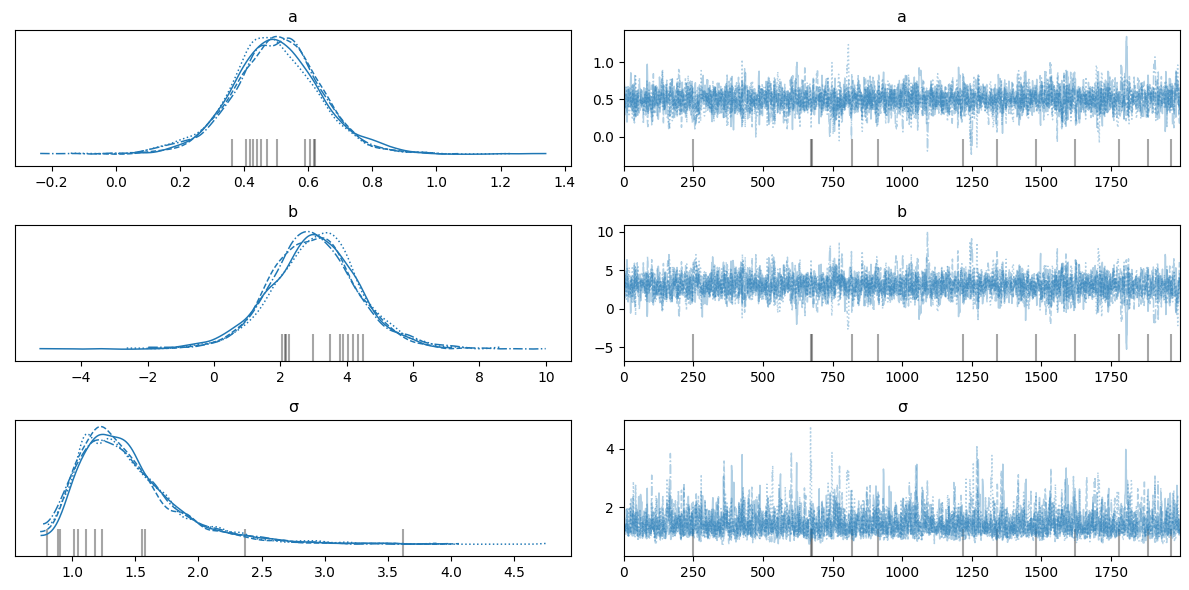

In [18]:
az.plot_trace(ols_trace);
plt.tight_layout()

## 4.2. Bayesian Robust Linear regression

In [19]:
with pm.Model() as robust_model:
    # Priors
    a = pm.Normal("a", 0, 2.5)
    b = pm.Normal("b", 0., 10)    
    σ = pm.HalfNormal("σ", 2.5)
    ν = pm.Uniform("ν", 1, 10)
    
    # Likelihood
    y_obs = pm.StudentT("y_obs", mu=a*x + b, sigma=σ, nu=ν, observed=y)
    
    robust_trace = pm.sample(2000)    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, σ, ν]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.


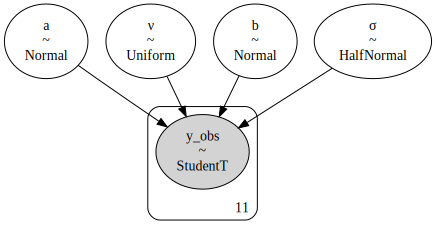

In [20]:
pm.model_to_graphviz(robust_model)

In [21]:
a_bays_robust = robust_trace.posterior["a"].mean().values.round(ROUND)
b_bays_robust = robust_trace.posterior["b"].mean().values.round(ROUND)
a_bays_robust, b_bays_robust

(0.3453, 4.0065)

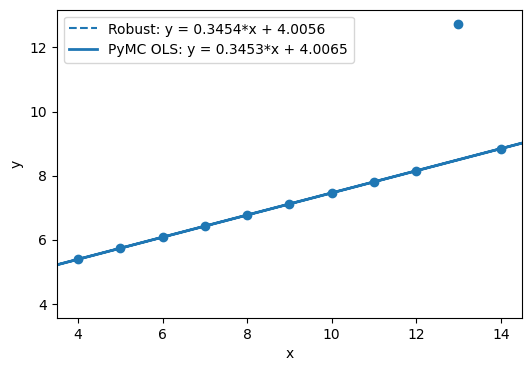

In [22]:
plt.scatter(x, y);
plot_line(a_robust, b_robust, c='C0', ls='--', label="Robust");
plot_line(a_bays_robust, b_bays_robust, c='C0', label="PyMC OLS", lw=2);
# Plot many lines from posterior distributions
for a_, b_ in (robust_trace.posterior[["a", "b"]].sel(chain=0).thin(100).to_array().T):
    plot_line(a_.values, b_.values, c='C0', alpha=0.2);

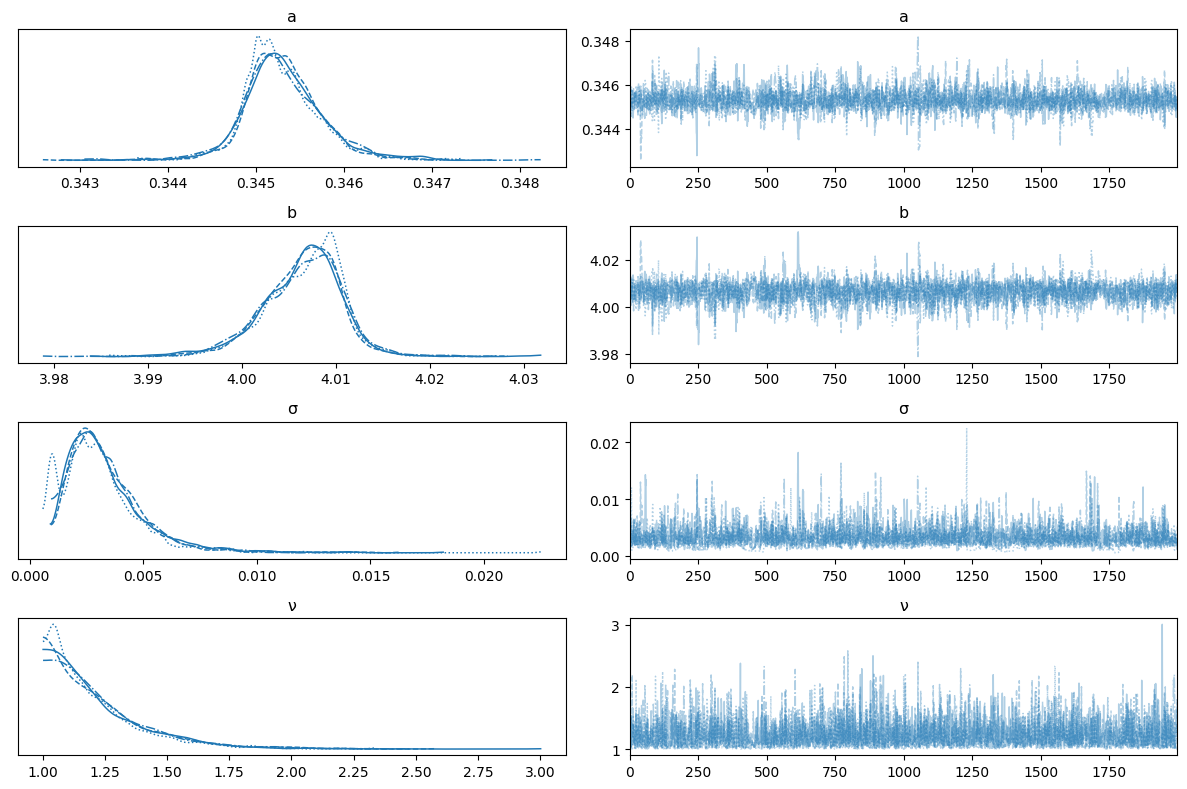

In [23]:
az.plot_trace(robust_trace);
plt.tight_layout()

## 5. More on PyMC: numerous distributions



## 5. More on PyMC: various examples and applications!

![PyMC](images/pymc_examples.png)

See PyMC Documentation: [Example Gallery](https://www.pymc.io/projects/examples/en/latest/gallery.html)

## References

### Code
- https://github.com/danhphan/workshops

### Theory
- [Statistical Rethinking](https://xcelab.net/rm/statistical-rethinking/) by Richard McElreath
- [Statistical Rethinking in PyMC](https://github.com/pymc-devs/pymc-resources/tree/main/Rethinking_2)

### PyMC

- [A Modern Introduction to Probabilistic Programming with PyMC](https://austinrochford.com/posts/intro-prob-prog-pymc.html#Robust-regression) by Austin Rochford
- PyMC [quickstart guide](https://www.pymc.io/projects/examples/en/latest/howto/api_quickstart.html), [tutorial](https://docs.pymc.io/en/latest/learn/core_notebooks/pymc_overview.html), and [example gallery](https://www.pymc.io/projects/examples/en/latest/gallery.html)
- Book: [Bayesian Analysis with Python](https://www.packtpub.com/big-data-and-business-intelligence/bayesian-analysis-python-second-edition)
- Book: [Probabilistic Programming & Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/)
- Book: [Bayesian Modeling and Computation in Python](https://bayesiancomputationbook.com/welcome.html)